<a href="https://colab.research.google.com/github/Vasanth12414/Deep-Learning-Models/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download safurahajiheidari/kidney-stone-images

Dataset URL: https://www.kaggle.com/datasets/safurahajiheidari/kidney-stone-images
License(s): other
 90% 19.0M/21.1M [00:02<00:00, 17.4MB/s]
100% 21.1M/21.1M [00:02<00:00, 10.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/kidney-stone-images.zip')
zip_ref.extractall('/content')
zip_ref.close()



In [4]:

DATADIR = '/content/KidneyDisease'
CATEGORIES  = ['TestImages','TrainImages','ValidImages']


In [5]:
# import os
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2

# for category in CATEGORIES:
#     path = os.path.join(DATADIR,category)
#     images = os.listdir(path)
#     fig , ax = plt.subplots(1,3, figsize=(10,4))
#     fig.suptitle(f'{category}',fontsize = 18)
#     for i in range(5):
#       img_name = images[np.random.randint(0,len(images))]
#       img_path = os.path.join(path,img_name)
#       img_array = cv2.imread(img_path)
#       # img = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
#       ax[i].imshow(img_array)
#       ax[i].axis('off')

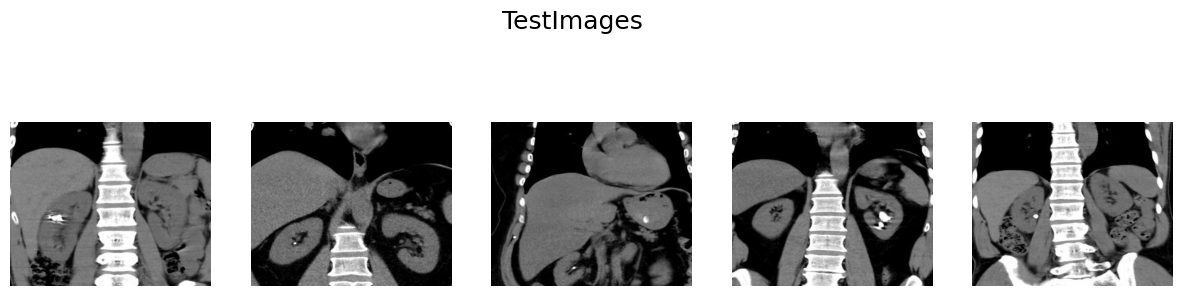

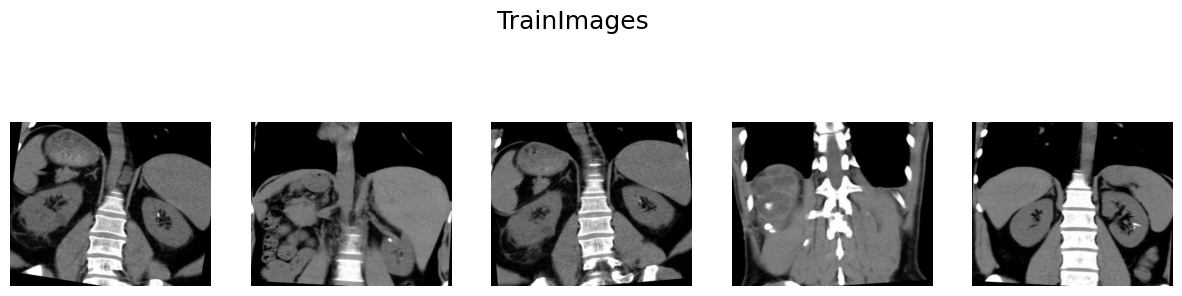

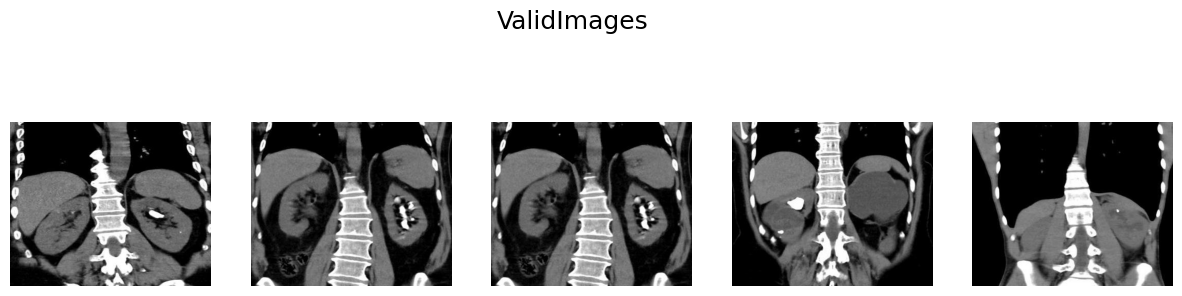

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

DATADIR = '/content/KidneyDisease'
CATEGORIES  = ['TestImages','TrainImages','ValidImages']

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    images = os.listdir(path)

    fig, axes = plt.subplots(1, 5, figsize=(15, 4))
    fig.suptitle(f'{category}', fontsize=18)

    for i in range(5):
        img_name = images[np.random.randint(0, len(images))]
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path)

        axes[i].imshow(img_array)
        axes[i].axis('off')

    plt.show()

In [7]:
img_array.shape

(320, 391, 3)

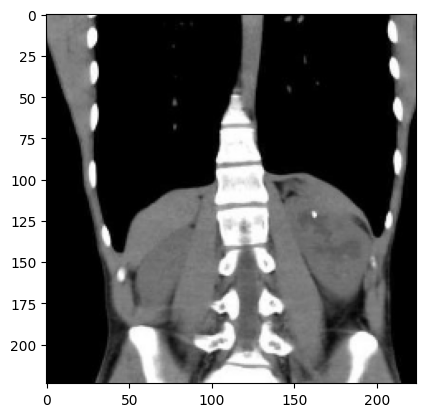

In [8]:
IMG_SIZE = 224
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_data = []
def create_train_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    # images = os.listdir(path)
    labels = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_path = os.path.join(path,img)
        img_array = cv2.imread(img_path)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,labels])
      except Exception as e:
        pass
create_train_data()




In [11]:
len(training_data)

1300

In [12]:
x = []
y = []
for features , labels in training_data:
  x.append(features)
  y.append(labels)

In [13]:
type(x),type(y)

(list, list)

In [14]:
x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array(y)

In [15]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [17]:
print(f'x_train Length: {x_train.shape[0]},X_train Image Size : {x_train.shape[1:3]},X_train Channel Dimension : {x_train.shape[3]}')
print(f'x_test Length: {x_test.shape[0]},X_test Image Size : {x_test.shape[1:3]},X_test Channel Dimension : {x_test.shape[3]}')


x_train Length: 1040,X_train Image Size : (224, 224),X_train Channel Dimension : 3
x_test Length: 260,X_test Image Size : (224, 224),X_test Channel Dimension : 3


In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import vgg16

In [19]:
vgg = vgg16.VGG16(weights = 'imagenet',include_top = False,input_shape = (IMG_SIZE,IMG_SIZE,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [20]:
for layer in vgg.layers:
  layer.trainable = False

In [44]:
model = keras.Sequential([
    vgg,
    keras.layers.GlobalAveragePooling2D(),
    # keras.layers.Dense(128,activation = 'relu'),
    # keras.layers.Dense(64,activation = 'relu'),
    # keras.layers.Dense(3,activation = 'softmax')
    keras.layers.Dense(1024,activation = 'relu'),
    keras.layers.Dense(512,activation = 'relu'),
    keras.layers.Dense(3,activation = 'softmax')

])


In [45]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [48]:
model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9816 - loss: 0.0606
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.9847 - loss: 0.0414
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9892 - loss: 0.0276
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.9993 - loss: 0.0112
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9936 - loss: 0.0207


In [49]:
loss , accuracy = model.evaluate(x_test,y_test)
print(f'Model Accuracy: {accuracy * 100}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.8974 - loss: 0.4027
Model Accuracy: 89.61538672447205


In [50]:
pred = np.argmax(model.predict(x_test), axis = -1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step


In [51]:
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1,
       1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [52]:
y_test[:5]

array([1, 1, 1, 1, 1])

In [53]:
pred[:5]

array([1, 1, 1, 1, 1])

In [54]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        24
           1       0.96      0.98      0.97       211
           2       0.59      0.52      0.55        25

    accuracy                           0.90       260
   macro avg       0.71      0.69      0.70       260
weighted avg       0.89      0.90      0.89       260



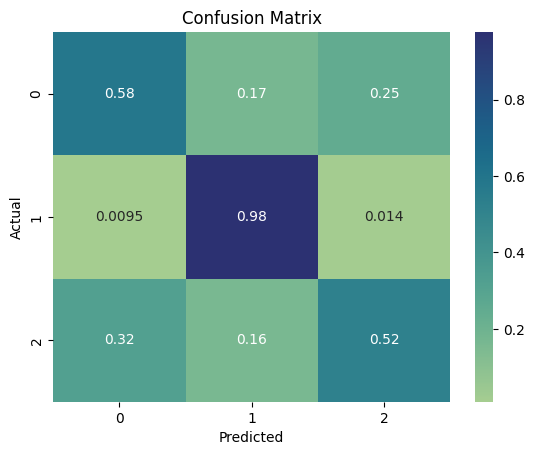

In [55]:
cf = confusion_matrix(y_test,pred , normalize='true')
import seaborn as sns
sns.heatmap(cf , annot=True,cmap='crest')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()